<a href="https://colab.research.google.com/github/wiwekapremana/Heart-Disease-prediction/blob/main/Proyek_Pertama_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Nama : Komang Wiweka Premana
##Dataset : https://www.kaggle.com/johnsmith88/heart-disease-dataset

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#Import Data

In [ ]:
! pip install -q kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wiwekapremana","key":"ced7b6390c8252c02cfd38cad8614014"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset
!unzip /content/heart-disease-dataset.zip

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 10.4MB/s]
Archive:  /content/heart-disease-dataset.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               


In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.260488,244.981463,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.694146,2.323902,0.513171
std,9.072290,0.460373,1.029641,16.532208,47.746162,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,0.890414,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,371.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.500000,3.000000,1.000000


In [ ]:
heart.shape

(1025, 14)

# Data Information
* age:- Usia pasien

* sex:- Jenis kelamin pasien (1 = 'Laki laki' and 0 = 'perempuan')

* cp:- cp adalah singkatan dari chest pain. Dalam dataset ini, ada empat jenis nyeri dada (0=asimtomatik, 1= angina tipikal, 2=angina atipikal, 3=nyeri non-angina)

* trestbps:- Resting blood pressure(in mm hg on admission to the hospital)

* chol:- Serum kolestrol dalam mg/dl

* fbs:- Gula darah>120mg/dl (1=true, 0=false)

* restecg:-Hasil elektrokardiografi (0=normal, 1=having ST-T wave normality, 2=hypertrophy)

* thalachh:- Detak jantung maksimum

* exang:-  latihan angina yang diinduksi (1=yes, 0=no)

* oldpeak:- Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat

* slope:- Kemiringan segmen ST latihan(0= dowmsloping, 1=flat, 2=upsloping)

* ca: -jumlah dari major vessels(0-3) coloured by flourosopy)

* thal:-Kelainan darah(1=fixed defect, 2=normal, 3=reversable defect)

* target:- target variable dan predicted attribute(0=less chance of heart attack, 1=high rate of heart attack)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Karena semua data tidak ada yang kosong, jadi tidak perlu melakukan cleanup

## Mengecek keseimbangan data

In [ ]:
ax= px.pie(heart['target'], names= "target",title= "target")
ax.show()

Berdasarkan diagram diatas dapat dilihat bahwa target variable dengan value 1 lebih besar dari value 0

# EDA

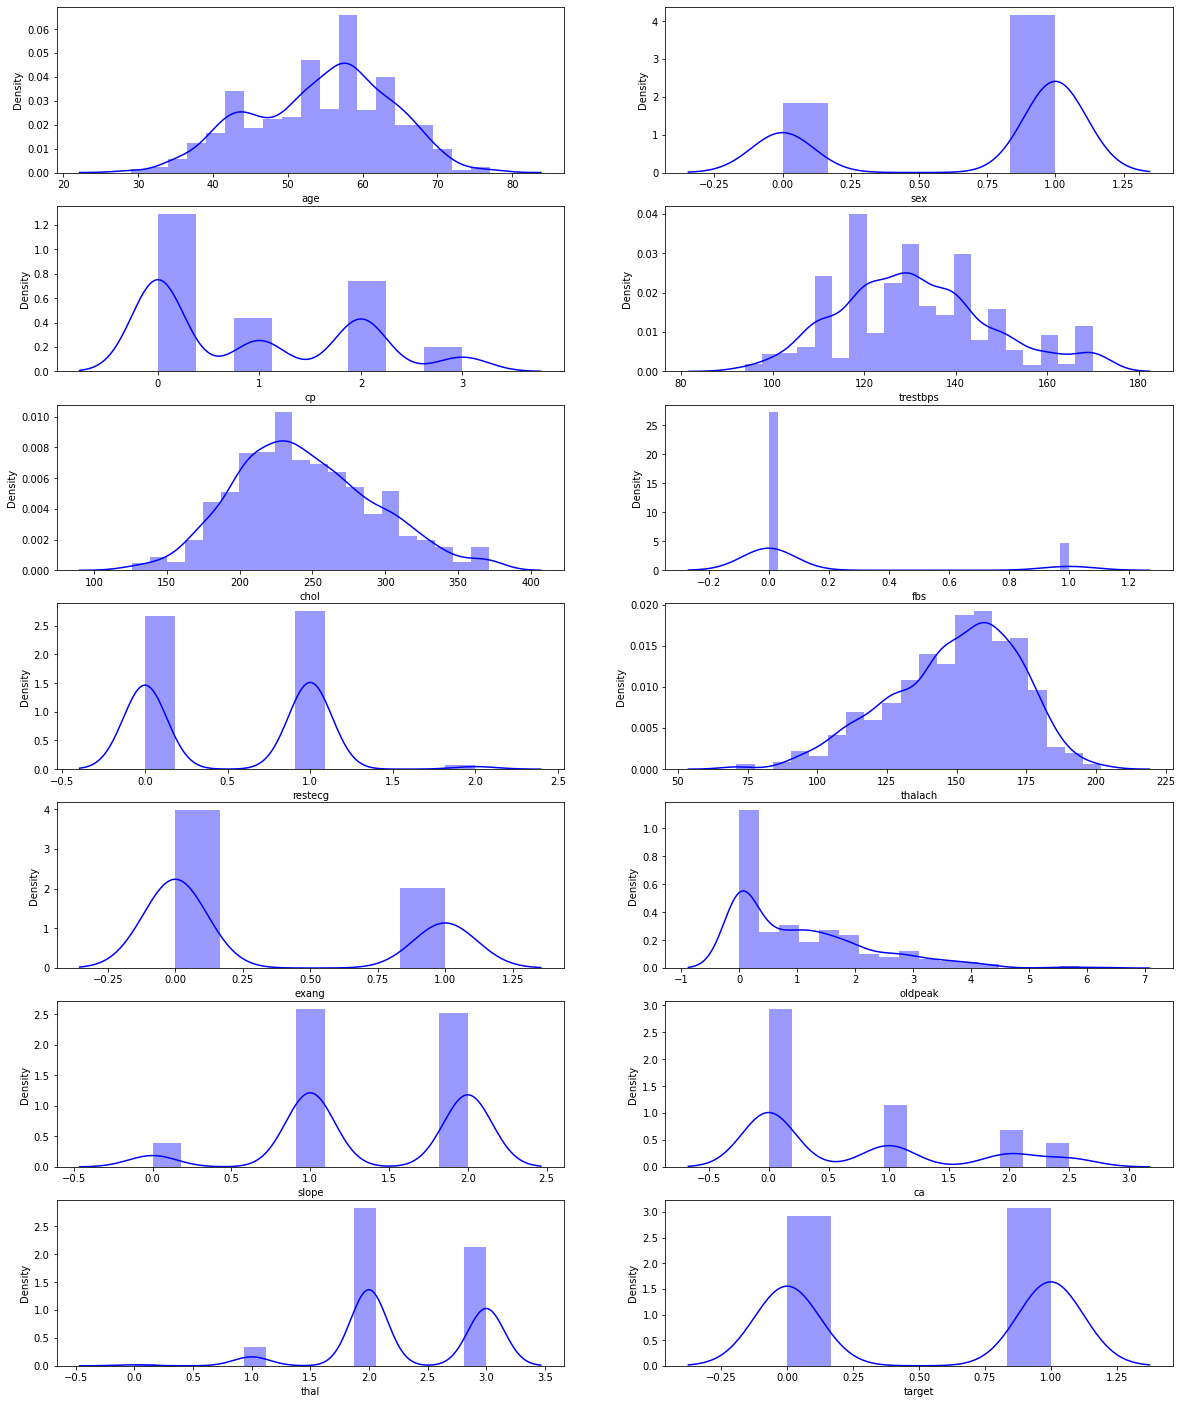

In [ ]:
columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
for i in range(7):
    for j in range(2):
            sns.distplot(heart[columns[k]], ax = ax1[i][j], color = 'blue')
            k += 1
plt.show()

Berdasarkan diagram diatas ternyata masih banyak kolom yang memiliki kemiringingan yang tinggi atau tidak seimbang

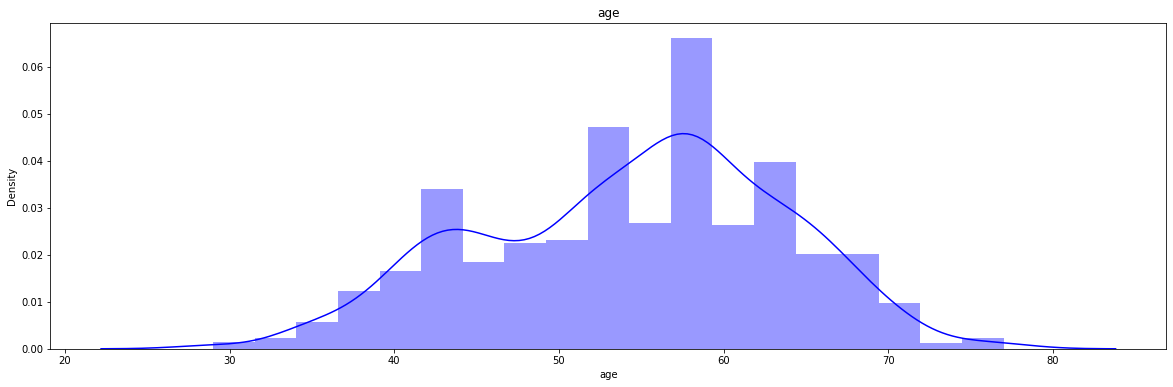

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(heart["age"],color="blue",bins="auto")
plt.title("age")
plt.show()

Berdasarkan diagram diatas bahwa pasien yang memiliki umur 55-60 lebih rentan terkena penyakit gagal jantung 

In [ ]:
ax= px.pie(heart['sex'], names= "sex",title= "Perbandingan Kasus Penyakit Jantung Berdasarkan Gender")
ax.show()

Berdasarkan diagram diatas dapat dilihat bahwa jenis kelamin laki laki lebih banyak yang terkena penyakit serangan jantung sebanyak 69.6%

In [ ]:
gender1 = heart[heart['sex'] == 1].reset_index()
gender0 = heart[heart['sex'] == 0].reset_index()

In [ ]:
ax = px.pie(gender1, names ='target',title= "Tingkat Kematian 1 (Laki Laki)")
ax.show()

In [ ]:
ax = px.pie(gender0,names = "target",title="Tingkat Kematian 0 (Perempuan)")
ax.show()

Berdasarkan hasil analisis daiatas dapat disimpulkan bahwa Jenis (Perempuan) memiliki tingkat kematian yang tinggi sebanyak 72.4% dibandingkan dengan laki sebanyak 57.9%

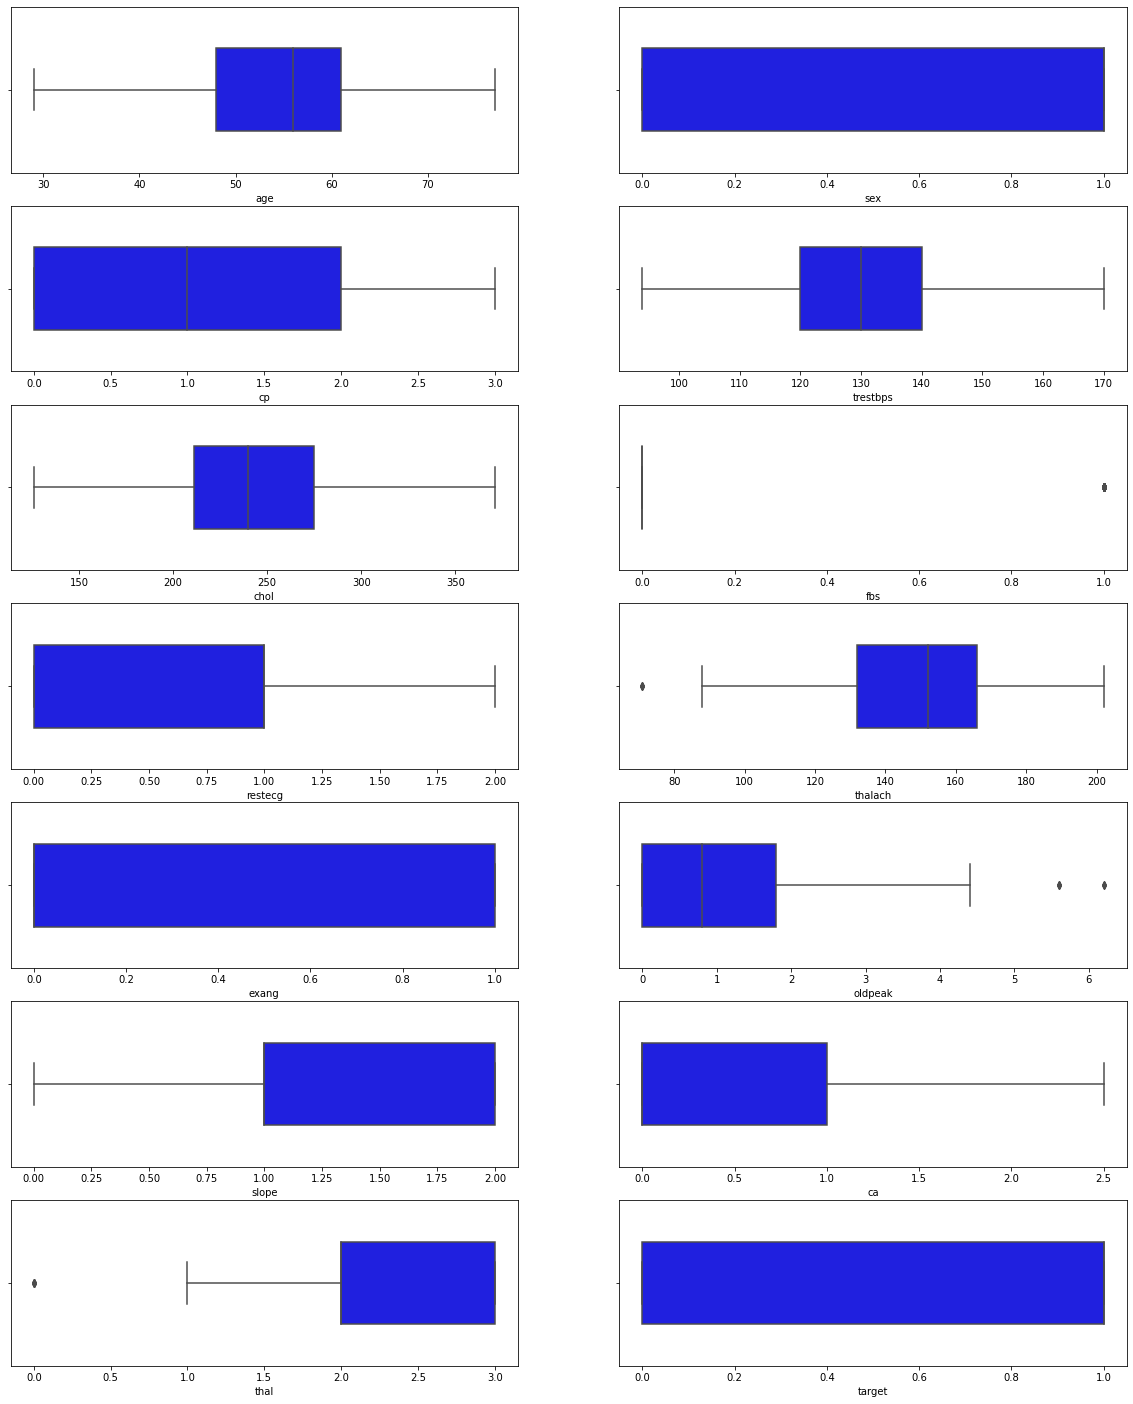

In [ ]:
columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
for i in range(7):
    for j in range(2):
            sns.boxplot(heart[columns[k]], ax = ax1[i][j], color = 'blue',width = 0.5)
            k += 1
plt.show()

Dapat dilihat bahwa terdapat outliers di features kita

# Data Pre-Processing

In [ ]:
corr = heart.corr()

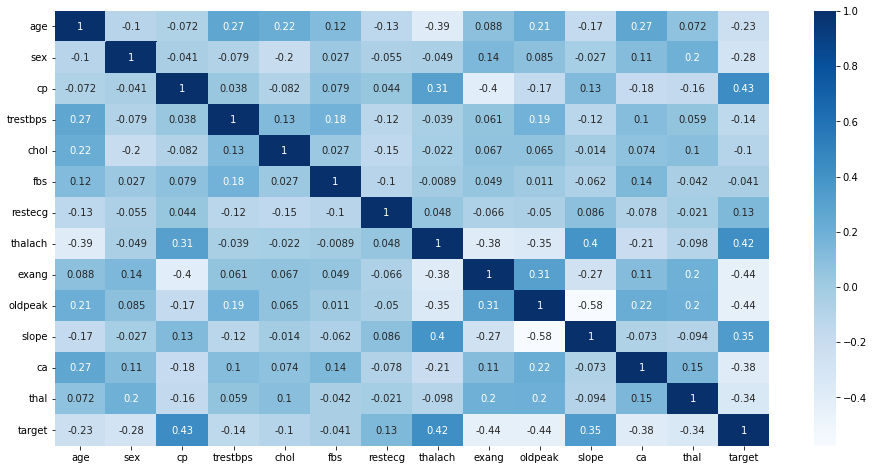

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap = 'Blues', annot=True)
plt.show()

In [ ]:
corr['target']

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

Kita dapat melihat bahwa yang memiliki korelasi terendah dengan 'target'  adalah 'fbs' dan 'chol' sedangkan 'oldpeak' dan 'exang' memiliki korelasi negatif yang paling kuat. Untuk korelasi positif yang paling tinggi adalah 'cp', dan 'slope'.

# Outliers


Outliers:
Outlier pada data ini cukup besar dan tentunya ini dapat mempengaruhi dalam mengukur prediksi suatu data

IQR(inter quartile range):
merupakan ukuran variabilitas yang didasarkan pada pembagian kumpulan data menjadi kuartil. Kuartil membagi kumpulan data terurut menjadi empat bagian yang sama besar. Nilai yang memisahkan bagian-bagian ini disebut kuartil pertama, kedua (median), dan ketiga yang masing-masing dilambangkan dengan Q1, Q2, dan Q3

- cari Q1,Q2,Q3
- Mencari IQR = Q3 - Q1
- Multiply IQR dengan 1.5
- Kurangi angka ini dari Q1 dan tambahkan angka ini ke Q3
- Jika titik terletak pada rentang yang diperoleh di atas maka itu bukan outlier, jika tidak maka itu adalah outlier.

In [ ]:
# Q1 
q1 = heart.quantile(0.25)
# Q3
q3 = heart.quantile(0.75)
# IQR
IQR = q3 - q1
# Outlier range
upper = q3 + IQR * 1.5
lower = q1 - IQR * 1.5
upper_dict = dict(upper)
lower_dict = dict(lower)

In [ ]:
for i,v in heart.items():
    v_col = v[( v<= lower_dict[i]) | (v >= upper_dict[i])]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
    print("Column {} outliers = {} => {}%".format(i,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column sex outliers = 0 => 0.0%
Column cp outliers = 0 => 0.0%
Column trestbps outliers = 45 => 4.39%
Column chol outliers = 16 => 1.561%
Column fbs outliers = 1025 => 100.0%
Column restecg outliers = 0 => 0.0%
Column thalach outliers = 4 => 0.39%
Column exang outliers = 0 => 0.0%
Column oldpeak outliers = 7 => 0.683%
Column slope outliers = 0 => 0.0%
Column ca outliers = 87 => 8.488%
Column thal outliers = 7 => 0.683%
Column target outliers = 0 => 0.0%


Kita memiliki kolom ca, chol, trestbps yang memiliki sejumlah outlier

### Karena dataset sudah kecil , saya tidak akan mengatasinya dengan menghapus outlier melainkan saya akan menggantinya dengan batas atas atau bawah yang dapat diterima.

In [ ]:
heart['trestbps'].replace(list(heart[heart['trestbps'] > upper_dict['trestbps']].trestbps) ,upper_dict['trestbps'],inplace=True)
heart['chol'].replace(list(heart[heart['chol'] > upper_dict['chol']].chol) ,upper_dict['chol'],inplace=True)
heart['ca'].replace(list(heart[heart['ca'] > upper_dict['ca']].ca) ,upper_dict['ca'],inplace=True)

In [ ]:
heart['trestbps'].replace(list(heart[heart['trestbps'] < lower_dict['trestbps']].trestbps) ,lower_dict['trestbps'],inplace=True)
heart['chol'].replace(list(heart[heart['chol'] < lower_dict['chol']].chol) ,lower_dict['chol'],inplace=True)
heart['ca'].replace(list(heart[heart['ca'] < lower_dict['ca']].ca) ,lower_dict['ca'],inplace=True)

# Train Test Split

In [ ]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(heart.iloc[:,:13])
robust_df = pd.DataFrame(robust_df, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
robust_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.307692,0.0,-0.5,-0.25,-0.437500,0.0,0.0,0.470588,0.0,0.111111,1.0,2.0,1.0
1,-0.230769,0.0,-0.5,0.50,-0.578125,1.0,-1.0,0.088235,1.0,1.277778,-1.0,0.0,1.0
2,1.076923,0.0,-0.5,0.75,-1.031250,0.0,0.0,-0.794118,1.0,1.000000,-1.0,0.0,1.0
3,0.384615,0.0,-0.5,0.90,-0.578125,0.0,0.0,0.264706,0.0,-0.444444,1.0,1.0,1.0
4,0.461538,-1.0,-0.5,0.40,0.843750,1.0,0.0,-1.352941,0.0,0.611111,0.0,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.230769,0.0,0.0,0.50,-0.296875,0.0,0.0,0.352941,1.0,-0.444444,1.0,0.0,0.0
1021,0.307692,0.0,-0.5,-0.25,0.281250,0.0,-1.0,-0.323529,1.0,1.111111,0.0,1.0,1.0
1022,-0.692308,0.0,-0.5,-1.00,0.546875,0.0,-1.0,-1.000000,1.0,0.111111,0.0,1.0,0.0
1023,-0.461538,-1.0,-0.5,-1.00,0.218750,0.0,-1.0,0.205882,0.0,-0.444444,1.0,0.0,0.0


In [ ]:
X = robust_df.values
Y = heart['target'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# Normalisasi Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [ ]:
model_LG = LogisticRegression(random_state=0)
model_LG.fit(X_train,Y_train)
lr_predict = model_LG.predict(X_test)
model_LG_accuracy=round(accuracy_score(Y_test,lr_predict), 4)*100 # Accuracy
print(classification_report(Y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84        98
           1       0.82      0.93      0.87       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [ ]:
lr_score = accuracy_score(Y_test, lr_predict)
print("Nilai Akurasi Logistic Regression: ", lr_score)

Nilai Akurasi Logistic Regression:  0.8585365853658536


# KNN

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=7)
model_KNN.fit(X_train,Y_train)
knn_predict = model_KNN.predict(X_test)
model_KNN_accuracy=round(accuracy_score(Y_test,knn_predict), 4)*100
print(classification_report(Y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        98
           1       0.82      0.92      0.87       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [ ]:
knn_score= accuracy_score(Y_test,knn_predict)
print("Nilai Akurasi KNN: ", knn_score)

Nilai Akurasi KNN:  0.8536585365853658


# Random Forest Classifier

In [ ]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model_RF.fit(X_train, Y_train)  
rf_predicted = model_RF.predict(X_test)
print(classification_report(Y_test,rf_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
rf_score = accuracy_score(Y_test,rf_predicted)
print("Nilai Akurasi Random Forest: ", rf_score)

Nilai Akurasi Random Forest:  1.0


#Kesimpulan

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Random Forest Classifier'],
    'Score Accuracy' : [ lr_score, knn_score, rf_score]
})
models.sort_values(by = 'Score Accuracy', ascending = False)

,Model,Score Accuracy
2,Random Forest Classifier,1.000000
0,Logistic Regression,0.858537
1,KNN,0.853659


In [ ]:
px.bar(data_frame = models, x = 'Model', y = 'Score Accuracy', color = 'Score Accuracy',  title = 'Perbandingan Score Accuracy Setiap Model')

Dari sini kita dapat menyimpulkan bahwa model yang lebih akurat dalam memprediksi serangan jantung pada seseorang adalah dengan menggunakan model Random Forest Regression dimana pada model ini memiliki accuracy tertinggi pada f1-score yaitu 100%.